## Heart Disease Predition - Group 2

In [267]:
#importing necessary librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
import warnings
warnings.filterwarnings('ignore')

In [268]:
#Loading the data in
df = pd.read_csv('Heart Disease.csv')

In [269]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [270]:
df.shape

(4238, 16)

In [271]:
df.describe(include = "all")

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [272]:
#null value check:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [273]:
#following gives missing value percentage. 
def getMissingCount(data):
    missingCount = data.isnull().sum() * 100/ len(data)
    return missingCount

getMissingCount(df)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

###### Glucose has 10% missing values and the rest are below 10%. Hence we don't need to discard any field. We can impute.

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


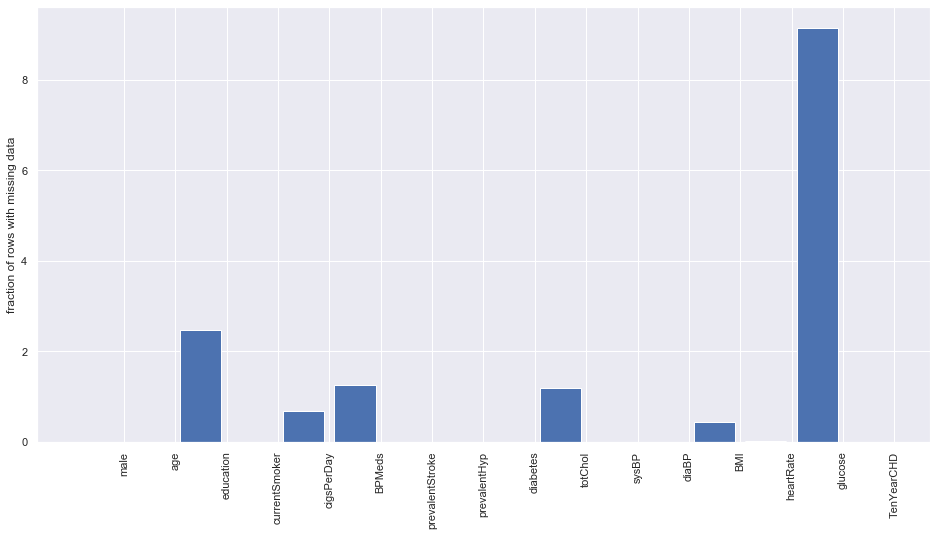

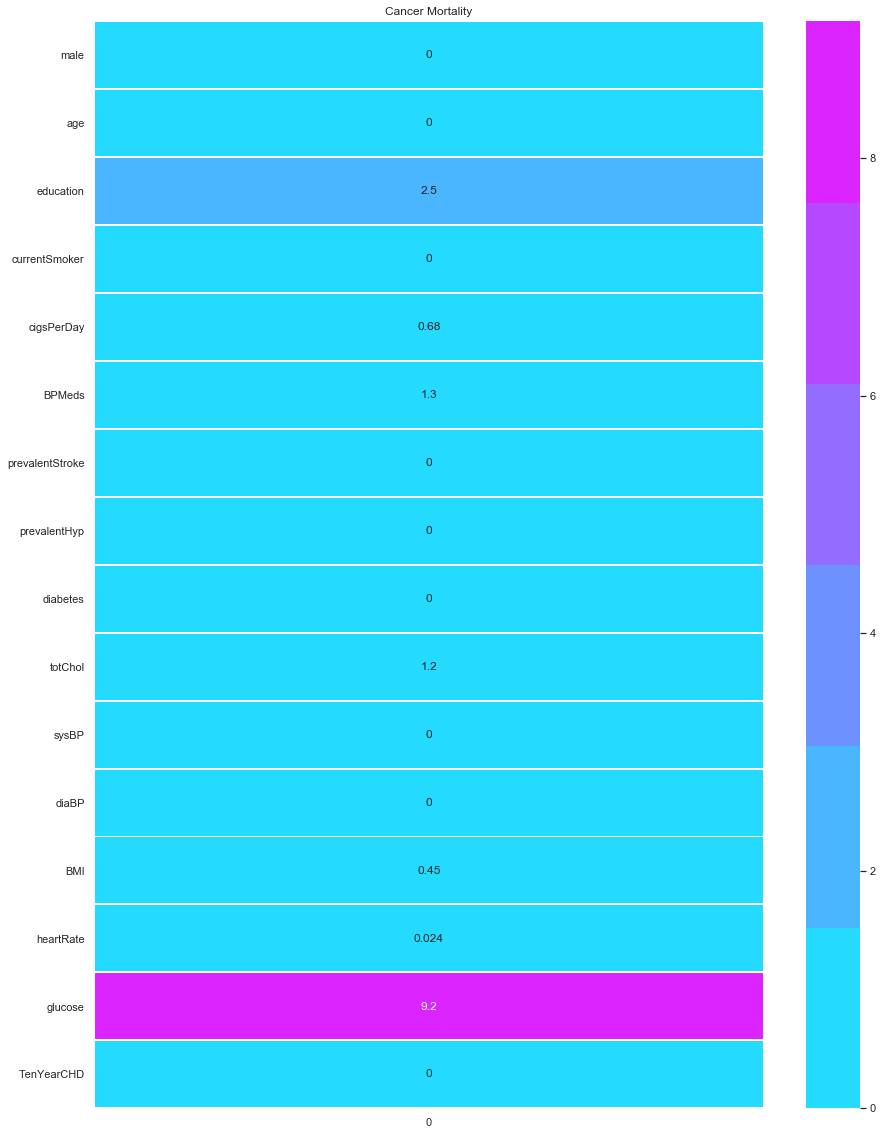

In [274]:
def visualizeMissingValue(data):
    missingCount = getMissingCount(data)
    #missingCount = data.isnull().sum()/ len(data)
    print(missingCount)
    plt.figure(figsize=(16, 8))
    plt.xticks(np.arange(len(missingCount)) + 0.5, missingCount.index, rotation='vertical')
    plt.ylabel('fraction of rows with missing data')
    plt.bar(np.arange(len(missingCount)), missingCount)
    plt.show()

    plt.figure(figsize=(15, 20))
    sns.heatmap(pd.DataFrame(data.isnull().sum() / data.shape[0] * 100), annot=True,
    cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
    plt.title("Cancer Mortality")
    plt.show()
# missingColumn = data.columns[data.isna().any()].tolist()
# print(missingColumn)
# msno.matrix(data.loc[:,['PctPrivateCoverageAlone']])
# msno.bar(data.loc[:,['PctPrivateCoverageAlone']], color="blue", log=False, figsize=(30, 18))
# msno.heatmap(data[missingColumn], figsize=(20, 20))
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

visualizeMissingValue(df)

In [275]:
def identifyColsToDrop(data, threshold=30.0):
    missingCols = getMissingCount(data)
    colsToDrop = missingCols[missingCols > threshold].index.values
    #colsToDrop = [col for (col, perc) in missingCols[missingCols > threshold].items()]
    return colsToDrop
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

def dropColumn(data, threshold):
    colsToDrop = self.identifyColsToDrop(data, threshold)
    data1 = data.drop(colsToDrop,axis=1)
    return data1
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

identifyColsToDrop(df)

array([], dtype=object)

###### We see that there aren't any nulls > 30 in any attribute

In [276]:
#checking for nulls > 80%
hf = df.isna().sum()
rows = df.count()[0]
Null_cols = hf[((hf*100/rows)>80.00)==True]*100/rows
Null_cols.count()

0

###### We don't have fields with nulls > 80% hence no elimination of attributes required

In [277]:
#Duplicates check:
len(df[df.duplicated()])

0

In [278]:
#checking for class imbalance problem:
df.TenYearCHD.value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

###### Our data has a class imbalance problem. Need to address this later

In [279]:
#checking for categorical data
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
        'diabetes', 'TenYearCHD'],
       dtype='object'),
 dtype('float64'): Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI',
        'heartRate', 'glucose'],
       dtype='object')}

###### Dataset doesn't have any categorical data that requires treatment

In [280]:
df.education.value_counts(dropna=False)

1.0    1720
2.0    1253
3.0     687
4.0     473
NaN     105
Name: education, dtype: int64

In [281]:
df.male.value_counts(dropna=False)

0    2419
1    1819
Name: male, dtype: int64

In [282]:
df.currentSmoker.value_counts(dropna=False)

0    2144
1    2094
Name: currentSmoker, dtype: int64

In [283]:
df.prevalentStroke.value_counts(dropna=False)

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [284]:
df.prevalentHyp.value_counts(dropna=False)

0    2922
1    1316
Name: prevalentHyp, dtype: int64

In [285]:
df.diabetes.value_counts(dropna=False)

0    4129
1     109
Name: diabetes, dtype: int64

In [291]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
        'diabetes', 'TenYearCHD'],
       dtype='object'),
 dtype('float64'): Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI',
        'heartRate', 'glucose'],
       dtype='object')}

In [292]:
#Converting all datatypes to integer for further processing
#df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose','heartRate']] = df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose','heartRate']].astype(int)
#df[['heartRate']] = df[['heartRate']].astype(int)
#df.iloc[:,0:8] = df.iloc[:,0:8].astype(int)

In [293]:
#Listing unique value counts in each feature
def getUniqueValues(data):
    colNames = data.columns
    listUnique = []
    for col in colNames:
        listUnique.append([col, data[col].nunique()])

    d1 = pd.DataFrame(listUnique)
    d1.columns = ['Feature Name', 'Unique Value']
    d1 = d1.sort_values(by='Unique Value', ascending=False)
    return d1

getUniqueValues(df)

,Feature Name,Unique Value
12,BMI,1364
9,totChol,249
10,sysBP,234
11,diaBP,146
14,glucose,144
13,heartRate,74
1,age,39
4,cigsPerDay,34
2,education,5
5,BPMeds,3


In [294]:
def getData(self):
    return self.data

def getCategoricalData(data):
    categoricalCols = getCategoricalCols(data)
    return data[categoricalCols]

def getNumericData(data):
    numericCols =geNumericCols(data)
    return data[numericCols]

def getCategoricalCols( data):
    return data.select_dtypes(include=["category"]).columns

def getObjectCols(data):
    return data.select_dtypes(include=["object"]).columns

def geNumericCols(data):
    return data.select_dtypes(include=["number"]).columns

numericCols =geNumericCols(df) # This will be used for binning later
categoricalCols =getCategoricalCols(df)

In [295]:
#Question.. is there a better way to assign this rather than maunally? since all the fields are of type numeric
numericCols=['totChol','glucose','sysBP','diaBP','heartRate','age','cigsPerDay','BMI']
categoricalCols=['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
df_numeric=df[numericCols]
df_categorical=df[categoricalCols]

In [286]:
#Performing mean imputation on the fields that have nulls
#df["education"].replace(np.nan, df["education"].astype("float32").mean(axis = 0), inplace = True)
#df["cigsPerDay"].replace(np.nan, df["cigsPerDay"].astype("float32").mean(axis = 0), inplace = True)
#df["BPMeds"].replace(np.nan, df["BPMeds"].astype("float32").mean(axis = 0), inplace = True)
#df["totChol"].replace(np.nan, df["totChol"].astype("float32").mean(axis = 0), inplace = True)
#df["BMI"].replace(np.nan, df["BMI"].astype("float32").mean(axis = 0), inplace = True)
#df["glucose"].replace(np.nan, df["glucose"].astype("float32").mean(axis = 0), inplace = True)
#df["heartRate"].replace(np.nan, df["heartRate"].astype("float32").mean(axis = 0), inplace = True)

In [287]:
from sklearn.impute import SimpleImputer
def imputeByMean(data, nonNumeric):
    imputedMean = SimpleImputer(strategy='mean') # for median imputation replace 'mean' with 'median'
    dataNumeric = data.drop(nonNumeric, axis=1)
    imputedMean.fit(dataNumeric)
    imputedData = imputedMean.transform(dataNumeric)

    d1 = pd.DataFrame(imputedData)
    d1.columns = dataNumeric.columns
    finalImputedData = pd.concat([d1, data.loc[:,nonNumeric]], axis=1)
## imputedData.columns = data.columns
    return finalImputedData
cols = df.columns
num_cols = df._get_numeric_data().columns
nonNumeric=list(set(cols) - set(num_cols))

imputeByMean(df,nonNumeric)

#Use Mice 
#For categorical - delete rows and apply mice on numerical 


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966751,0.0


In [304]:
#following is not working 
from fancyimpute import MICE as mice
from fancyimpute import IterativeImputer 
def imputeByMice(data, numericCols):

#dataNumeric = data.drop(nonNumeric, axis=1)
# numericCols = data.select_dtypes(include=["number"]).columns
    dataNumeric = data[numericCols]
    nonNumericCols = [col for col in data.columns if col not in numericCols]
    d2 = data[nonNumericCols]
# start the MICE training
    imputedDataMice = mice(dataNumeric.values)
    d1 = pd.DataFrame(imputedDataMice)
    d1.columns = dataNumeric.columns
    imputedData = pd.concat([d1, d2], axis=1)
## imputedData.columns = data.columns
    return imputedData
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))
imputeByMice(df, numericCols)

ModuleNotFoundError: No module named 'fancyimpute'

In [290]:
#checking for outliers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721586,132.352407,82.893464,25.802007,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
90%,1.000000,62.000000,4.000000,1.000000,25.000000,0.00000,0.000000,1.000000,0.000000,292.000000,162.000000,98.000000,30.763000,92.000000,97.000000,1.000000
95%,1.000000,64.000000,4.000000,1.000000,30.000000,0.00000,0.000000,1.000000,0.000000,312.000000,175.000000,104.575000,32.771500,98.000000,107.000000,1.000000
99%,1.000000,67.000000,4.000000,1.000000,43.000000,1.00000,0.000000,1.000000,1.000000,353.630000,200.000000,118.000000,38.952600,110.000000,170.000000,1.000000


###### When training, the following outliers can be treated: 
    cigsPerDay>43
    totChol>354
    BMI> 40
    glucose> 170

In [296]:
df_categorical

,education,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,4.0,1,0,0.00000,0,0,0,0
1,2.0,0,0,0.00000,0,0,0,0
2,1.0,1,1,0.00000,0,0,0,0
3,3.0,0,1,0.00000,0,1,0,1
4,3.0,0,1,0.00000,0,0,0,0
...,...,...,...,...,...,...,...,...
4233,1.0,1,1,0.00000,0,1,0,1
4234,3.0,1,1,0.00000,0,0,0,0
4235,2.0,0,1,0.02963,0,0,0,0
4236,1.0,0,1,0.00000,0,0,0,0


In [297]:
#checking for any single value columns
def removeSingleValueColumns(data):
    d1 = data.copy()
    for col in d1.columns:
        if d1[col].nunique() == 1:
            d1 = d1.drop([col], axis=1)
    return d1

df=removeSingleValueColumns(df)

###### No single value colums are present hence no attributes were dropped

In [299]:
#correlation analysis
def correlation(dataset,threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j] >=threshold) and (corr_matrix.columns[j] not in corr_col):
                colname = corr_matrix.columns[i]
                corr_col.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
                    
    print(corr_col)
    return corr_col
    
#corr_col = correlation(df,0.9)
corr_col = correlation(df_numeric,0.9)


set()


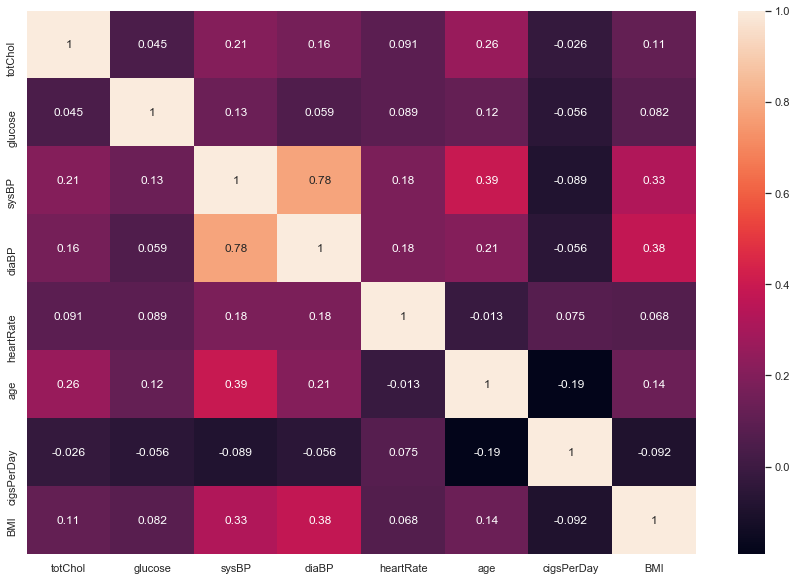

In [300]:
plt.figure(figsize=(15, 10))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True)
plt.show()
#do correlation separetely for categorical and numeric (dython for categorical- stat technique is different)
#question.. couldn't find dython

###### Neither of the attributes are highly correlated hence no requirement to drop any attributes

In [239]:
#scale data
from sklearn.preprocessing import MinMaxScaler
def minMaxScaler(data):
    scaler = MinMaxScaler()
    scaledData = scaler.fit_transform(data)
    scaledData = pd.DataFrame(scaledData, columns=data.columns)
    return scaledData

scaledData=minMaxScaler(df)


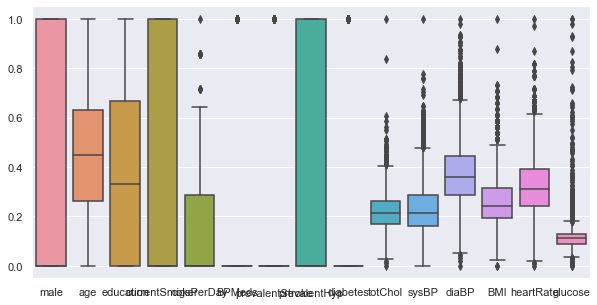

In [305]:
def visualizeOutlier(scaledData):
# dataNumeric = data.drop(nonNumeric, axis=1)
    sns.boxplot(data=scaledData.iloc[:,0:15])

visualizeOutlier(scaledData)

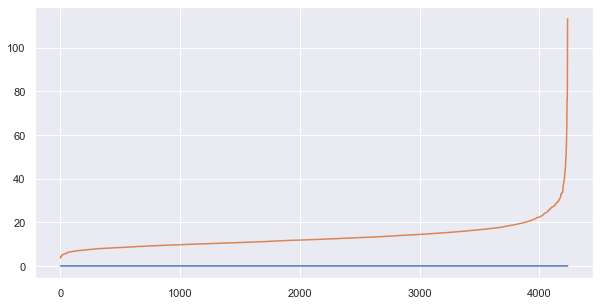

In [306]:
from sklearn.neighbors import NearestNeighbors

def findDBScanEPS(data, n_neighbors):
#try:
    nn = NearestNeighbors(n_neighbors=2)
    nbrs = nn.fit(data)
    distances, indices = nbrs.kneighbors(data)

    distances = np.sort(distances, axis=0)
    #distances = distances[:, 1]
    plt.plot(distances)
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

findDBScanEPS(df, 2)

Estimated number of clusters: 25
Estimated number of noise points: 139


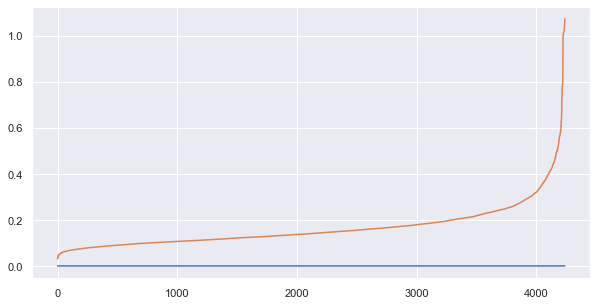

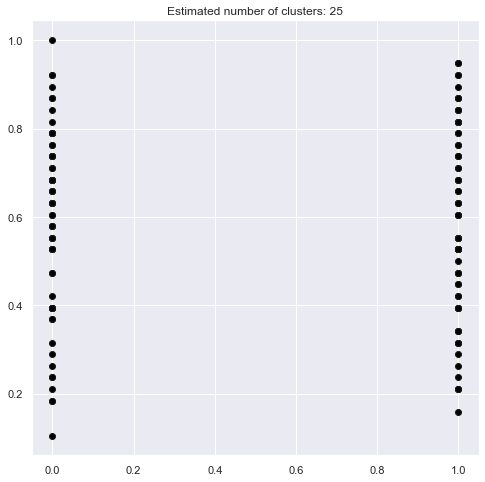

[37,
 44,
 138,
 161,
 247,
 249,
 255,
 260,
 284,
 294,
 311,
 357,
 443,
 471,
 475,
 481,
 646,
 660,
 665,
 738,
 763,
 786,
 833,
 864,
 952,
 976,
 1044,
 1068,
 1111,
 1123,
 1165,
 1238,
 1303,
 1340,
 1363,
 1485,
 1521,
 1553,
 1589,
 1601,
 1624,
 1649,
 1674,
 1808,
 1854,
 1856,
 1895,
 1907,
 1931,
 1975,
 1994,
 1997,
 2007,
 2036,
 2041,
 2091,
 2098,
 2174,
 2180,
 2187,
 2204,
 2299,
 2378,
 2406,
 2461,
 2471,
 2492,
 2560,
 2570,
 2600,
 2617,
 2645,
 2657,
 2668,
 2682,
 2733,
 2755,
 2756,
 2784,
 2796,
 2801,
 2855,
 2882,
 2893,
 2909,
 2926,
 2961,
 2983,
 3008,
 3088,
 3112,
 3136,
 3140,
 3160,
 3203,
 3242,
 3256,
 3314,
 3327,
 3402,
 3449,
 3458,
 3489,
 3493,
 3505,
 3540,
 3554,
 3604,
 3606,
 3671,
 3675,
 3680,
 3682,
 3721,
 3741,
 3749,
 3793,
 3809,
 3817,
 3839,
 3844,
 3846,
 3849,
 3862,
 3875,
 3927,
 3952,
 3971,
 4029,
 4035,
 4042,
 4057,
 4076,
 4096,
 4154,
 4194,
 4203,
 4223,
 4228]

In [307]:
from sklearn.cluster import DBSCAN

def DBScanOutlier(data): # DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
#try:
# dataNumeric = data.drop(nonNumeric, axis=1)
    d1 = data.copy()
#d1 = pd.get_dummies(d1[numericCols])

    scaler = MinMaxScaler()
    d2 = scaler.fit_transform(d1)
    d2 = pd.DataFrame(d2, columns=d1.columns)

    findDBScanEPS(d2, 5)
# epsfloat, default=0.5
# The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN
# parameter to choose appropriately for your data set and distance function.
# min_samplesint, default=5
# The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
# This includes the point itself.

    db = DBSCAN(eps=0.5, min_samples=5).fit(d2)

    from sklearn import metrics
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
# detectedCluster = DBSCAN(eps=3.0, metric='euclidean', min_samples=10, n_jobs=-1)
# clusters = detectedCluster.fit_predict(d2)
# Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(len(d2), labels))
#print("Completeness: %0.3f" % metrics.completeness_score(len(d2), labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(len(d2), labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(len(d2), labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(len(d2), labels))
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(d2, labels))

# Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=(8, 8))
    for k, col in zip(unique_labels, colors):
        if k == -1:
# Black used for noise.
            col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = d2[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = d2[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

#cmap = cm.get_cmap('Set1')
#d2.plot.scatter(x='avgDeathsPerYear', y='avgAnnCount', c=clusters, cmap=cmap, colorbar=False)
#plt.close()
    outlierRow = []
    for i in range(len(labels)):
        if (labels[i] == -1):
#print(list((i, labels[i])))
            outlierRow.append(i)

    return outlierRow

#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))


DBScanOutlier(df)


###### Since all attributes are integers hence encoding is not required.
Yet to do binning by age or any other field and check distribution. get feature importance. 

In [308]:
def createBin(data, numericCols, binNumber=4):
#try:
    d1 = data.copy()
    for i in numericCols[1:len(numericCols)]:
        bins = np.linspace(d1[i].min(), d1[i].max(), binNumber)
        d1[i + "Bin"] = pd.cut(d1[i], bins, precision=1, include_lowest=True, right=True)
#d1['PctWhiteBin'] = d1.PctWhiteBin.astype('category')

# d1['PctWhiteBin'] = pd.cut(d1.PctWhite / 100, bins, include_lowest=True, right=True)
    return d1
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

createBin(df, numericCols, binNumber=4)
#do binning for all numeric columns not categorical (covert to pct). 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,heartRate,glucose,TenYearCHD,glucoseBin,sysBPBin,diaBPBin,heartRateBin,ageBin,cigsPerDayBin,BMIBin
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,...,80.0,77.000000,0,"(39.9, 158.0]","(83.4, 154.0]","(47.9, 79.5]","(77.0, 110.0]","(31.9, 44.7]","(-0.1, 23.3]","(15.4, 29.3]"
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,...,95.0,76.000000,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,...,75.0,70.000000,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,...,65.0,103.000000,1,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(57.3, 70.0]","(23.3, 46.7]","(15.4, 29.3]"
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,...,85.0,85.000000,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,...,66.0,86.000000,1,"(39.9, 158.0]","(154.0, 224.5]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,...,65.0,68.000000,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(23.3, 46.7]","(15.4, 29.3]"
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,...,84.0,86.000000,0,"(39.9, 158.0]","(83.4, 154.0]","(47.9, 79.5]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,...,86.0,81.966751,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(31.9, 44.7]","(-0.1, 23.3]","(15.4, 29.3]"


In [309]:
def createCategoryPct(data, categoricalCols):
#try:
    d1 = data.copy()
    length = len(d1)
    for i in categoricalCols[1:len(categoricalCols)]:
        d1[i + 'Pct'] = (d1[i].groupby(d1[i]).transform('count'))*100/length
#d1[i + 'Pct'] = round(d1[i + 'Pct'],2)
#bins = np.linspace(d1[i].min(), d1[i].max(), binNumber)
#d1[i + "Bin"] = pd.cut(d1[i], bins, include_lowest=True, right=True)
    return d1
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))
createCategoryPct(df, categoricalCols)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,heartRate,glucose,TenYearCHD,malePct,currentSmokerPct,BPMedsPct,prevalentStrokePct,prevalentHypPct,diabetesPct,TenYearCHDPct
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,...,80.0,77.000000,0,42.921189,50.589901,95.823502,99.410099,68.947617,97.428032,84.804153
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,...,95.0,76.000000,0,57.078811,50.589901,95.823502,99.410099,68.947617,97.428032,84.804153
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,...,75.0,70.000000,0,42.921189,49.410099,95.823502,99.410099,68.947617,97.428032,84.804153
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,...,65.0,103.000000,1,57.078811,49.410099,95.823502,99.410099,31.052383,97.428032,15.195847
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,...,85.0,85.000000,0,57.078811,49.410099,95.823502,99.410099,68.947617,97.428032,84.804153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,...,66.0,86.000000,1,42.921189,49.410099,95.823502,99.410099,31.052383,97.428032,15.195847
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,...,65.0,68.000000,0,42.921189,49.410099,95.823502,99.410099,68.947617,97.428032,84.804153
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,...,84.0,86.000000,0,57.078811,49.410099,1.250590,99.410099,68.947617,97.428032,84.804153
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,...,86.0,81.966751,0,57.078811,49.410099,95.823502,99.410099,68.947617,97.428032,84.804153


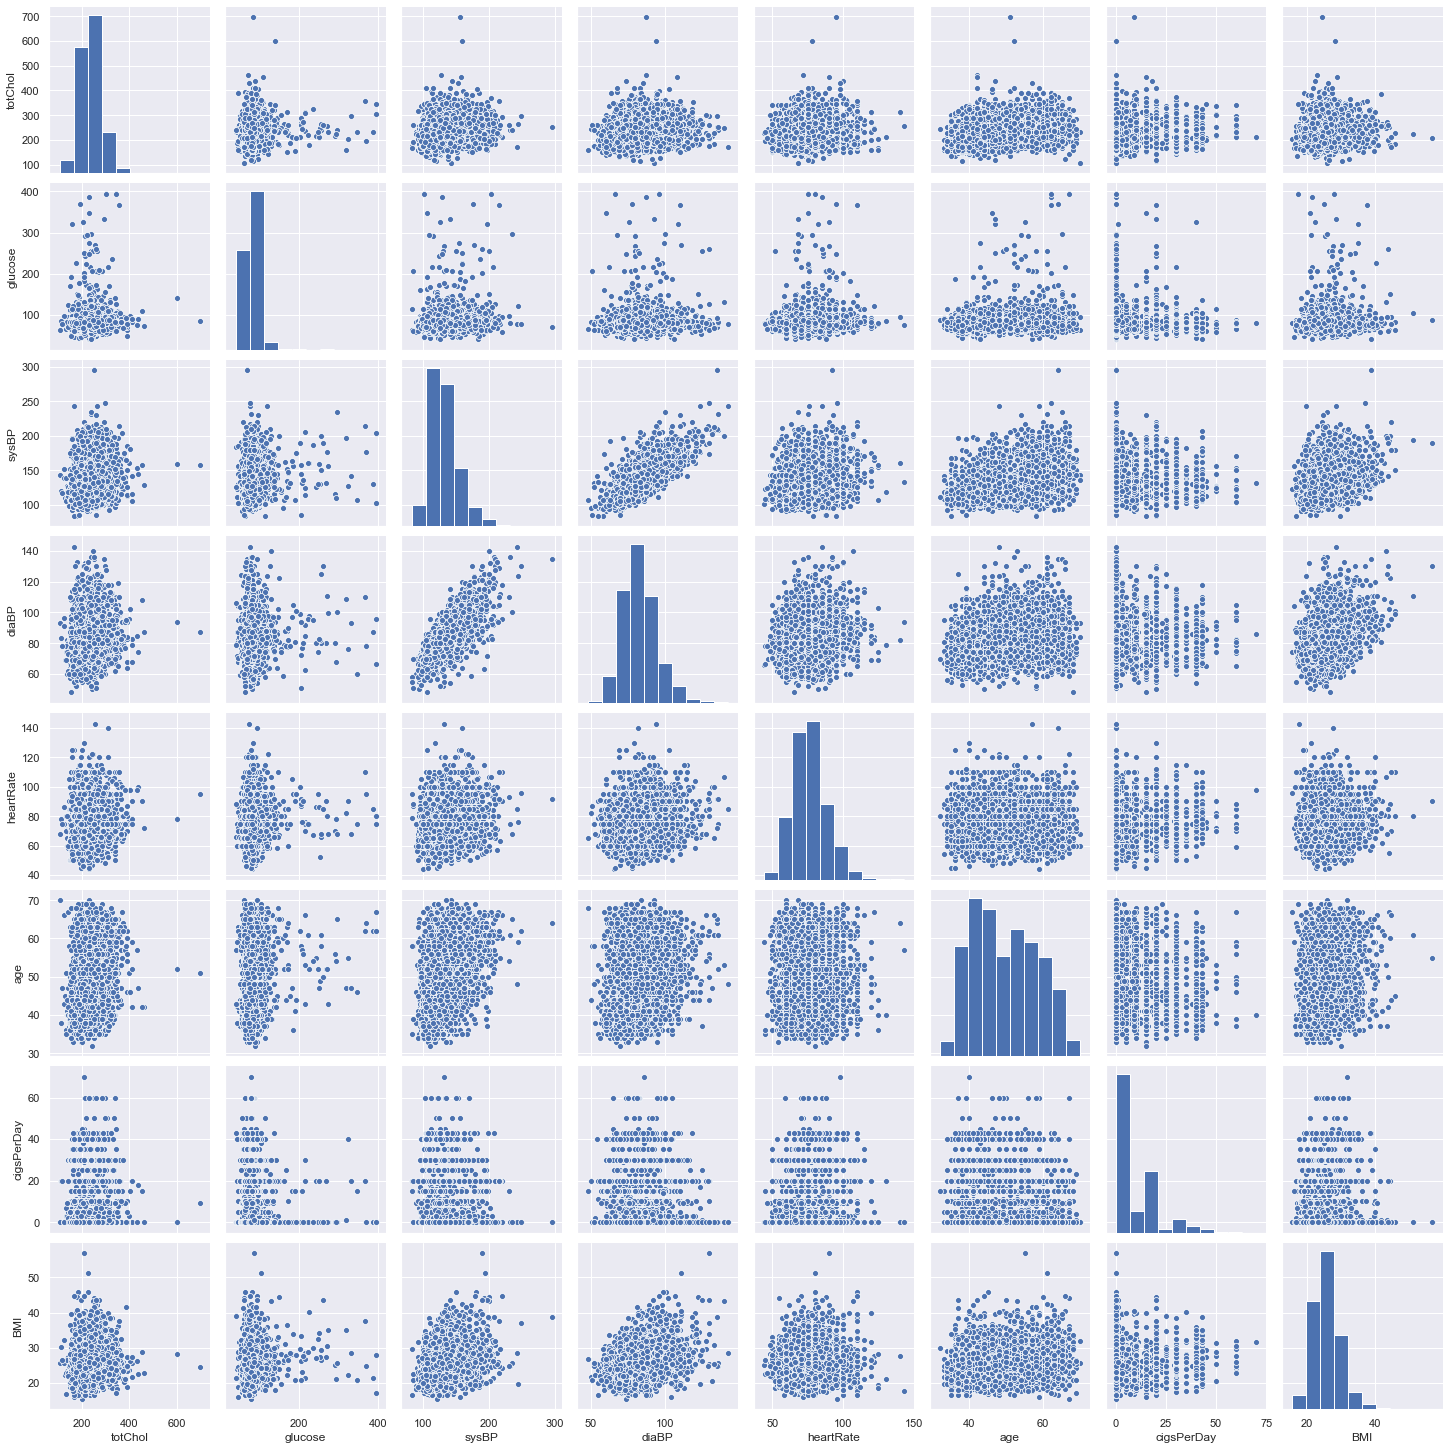

In [323]:
#seaborn graphs
import seaborn as sns
#sns.set_theme(style="ticks")
sns.pairplot(df_numeric)

In [327]:
sns.displot(
    df, x="totChol", col="TenYearCHD", row="male",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

AttributeError: module 'seaborn' has no attribute 'displot'

[Text(0, 0.5, '')]

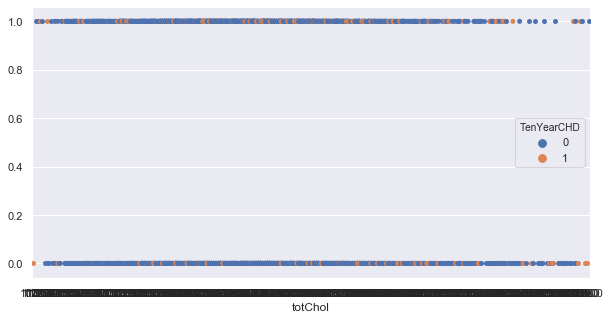

In [328]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="totChol", y="male", hue="TenYearCHD")
ax.set(ylabel="")

In [ ]:
#!pip install imblearn

In [318]:
#Ways to split columns for test train
X = df.iloc[:, :-1].values # copy all columns excluding last column
Y = df.iloc[:, -1].values   # copy the last column only
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [319]:
#Import Library of Logistic Regression
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    random_state=42
)
logisticRegr.fit(X_train, y_train)
logisticRegr_predict = logisticRegr.predict(X_test)
logisticRegr_predict_proba = logisticRegr.predict_proba(X_test)[:,1]
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print('Accuracy:',format(accuracy_score(y_test, logisticRegr_predict)*100))
print('AUC:',format(roc_auc_score(y_test, logisticRegr_predict_proba)*100))
print('Classification_report:',classification_report(y_test, logisticRegr_predict))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, logisticRegr_predict)
cm

Accuracy: 85.35031847133759
AUC: 73.54680847721238
Classification_report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1201
           1       0.61      0.07      0.12       212

    accuracy                           0.85      1413
   macro avg       0.73      0.53      0.52      1413
weighted avg       0.82      0.85      0.80      1413



array([[1192,    9],
       [ 198,   14]])

#### IGNORE FOLLOWING.. WORK IN PROGRESS

In [316]:
#Using SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter
counter=Counter(y_train)
print('before',counter)
smt=SMOTE()
X_train_sm, y_train_sm =smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print('after',counter)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())
clf.best_params_
lr1 = LogisticRegression(C=4,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()


ModuleNotFoundError: No module named 'imblearn'